In [78]:
import numpy as np
import cv2 as cv
import glob
from tqdm import tqdm
import PIL.ExifTags
import PIL.Image
from matplotlib import pyplot as plt 
from google.colab.patches import cv2_imshow

In [79]:
chessboard_size = (8,6)
framesize = (1920,1080)

In [80]:
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER,30,0.01)

In [81]:
objp = np.zeros((chessboard_size[0]*chessboard_size[1],3), np.float32)
objp[:,:2] = np.mgrid[0:chessboard_size[0], 0:chessboard_size[1]].T.reshape(-1,2)

In [82]:
objpoints = []
imgpoints = []

In [83]:
images = glob.glob('*.png')

In [84]:
for image in images:
  print(image)
  img = cv.imread(image)
  gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
  ret, corners = cv.findChessboardCorners(gray,chessboard_size,None)

  if ret == True:

    objpoints.append(objp)
    corners2 = cv.cornerSubPix(gray, corners, (11,11),(-1,-1),criteria)
    imgpoints.append(corners)

    cv.drawChessboardCorners(img, chessboard_size, corners2, ret)
    # cv.waitKey(1000)

cv.destroyAllWindows()

# print("Object Points: ",objpoints)
# print("image Points: ",imgpoints)


# ret, cameraMatrix, dist, rvecs, tvecs = cv.calibrateCamera(objpoints,imgpoints,framesize,None,None)

# print("Cam calibrated: ",ret)
# print("\nCamera Matrix:\n",cameraMatrix)
# print("\nDistortion Parameters:\n",dist)
# print("\nRotation Vectors:\n", rvecs)
# print("\nTranslation Vectors:\n",tvecs)

20230223182433.png
20230223182341.png
20230223182419.png
20230223182114.png
20230223182402.png
20230223182024.png


In [92]:
print(np.size(objpoints))

864


In [88]:
# ret, cameraMatrix, dist, rvecs, tvecs = cv.calibrateCamera(objpoints,imgpoints,framesize,None,None)
ret, cameraMatrix, dist, rvecs, tvecs = cv.fisheye.calibrate(objpoints,imgpoints,framesize,None,None)
print("Cam calibrated: ",ret)
print("\nCamera Matrix:\n",cameraMatrix)
print("\nDistortion Parameters:\n",dist)
print("\nRotation Vectors:\n", rvecs)
print("\nTranslation Vectors:\n",tvecs)

error: ignored

In [12]:
img = cv.imread('20230223182402.png')
h , w = img.shape[:2]
newCameraMatrix, roi = cv.getOptimalNewCameraMatrix(cameraMatrix,dist,(w,h),1,(w,h))

dst = cv.undistort(img,cameraMatrix,dist,None,newCameraMatrix)

x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
cv.imwrite('20230223181926Result1.png',dst)

True

In [14]:
mapx, mapy = cv.initUndistortRectifyMap(cameraMatrix,dist,None,newCameraMatrix,(w,h),5)
dst = cv.remap(img,mapx,mapy,cv.INTER_LINEAR)
x,y,w,h = roi
dst = dst[y:y+h,x:x+w]
cv.imwrite('20230223181926Result2.png',dst)
print(mapx.shape)

(545, 819)


In [89]:
mean_error = 0

for i in range(len(objpoints)):
  imgPoints2,_ = cv.projectPoints(objpoints[i],rvecs[i],tvecs[i],cameraMatrix,dist)
  error = cv.norm(imgpoints[i], imgPoints2,cv.NORM_L2)/len(imgPoints2)
  mean_error += error

print("\ntotal error:{}".format(mean_error/len(objpoints)))
print("\n\n\n")


total error:0.06583912500217991






In [15]:
import pandas as pd
from google.colab import files
import io

In [33]:
mapx = np.asarray(pd.read_csv("MX_tab.txt", sep='\t',header=None))
mapy = np.asarray(pd.read_csv("MY_tab.txt", sep='\t',header=None))
cameraMatrix = np.asarray(pd.read_csv("M_tab.txt", sep='\t',header=None))

In [34]:
print(cameraMatrix)

[[576.           0.         992.96032837]
 [  0.         576.         683.30589144]
 [  0.           0.           1.        ]]


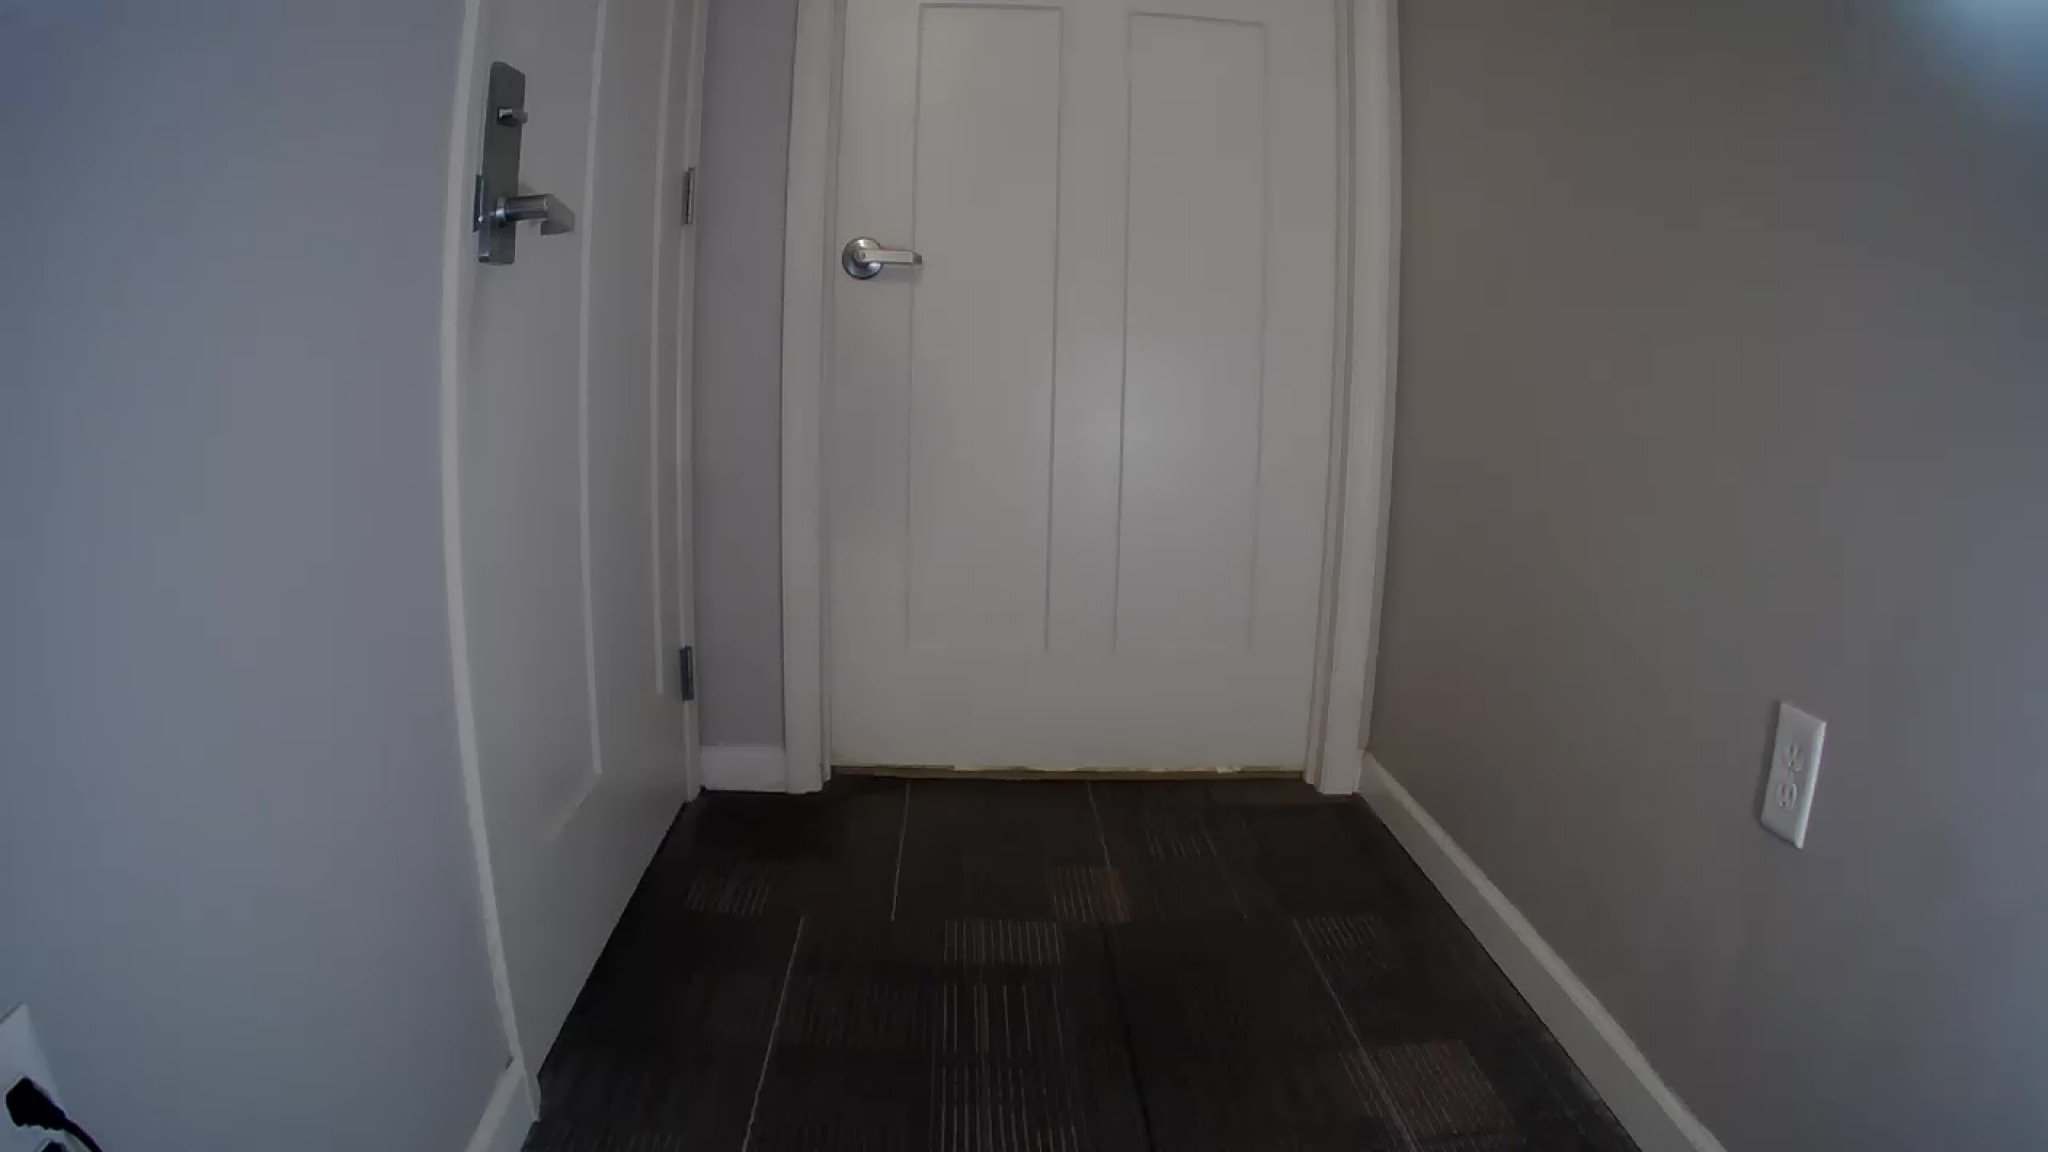

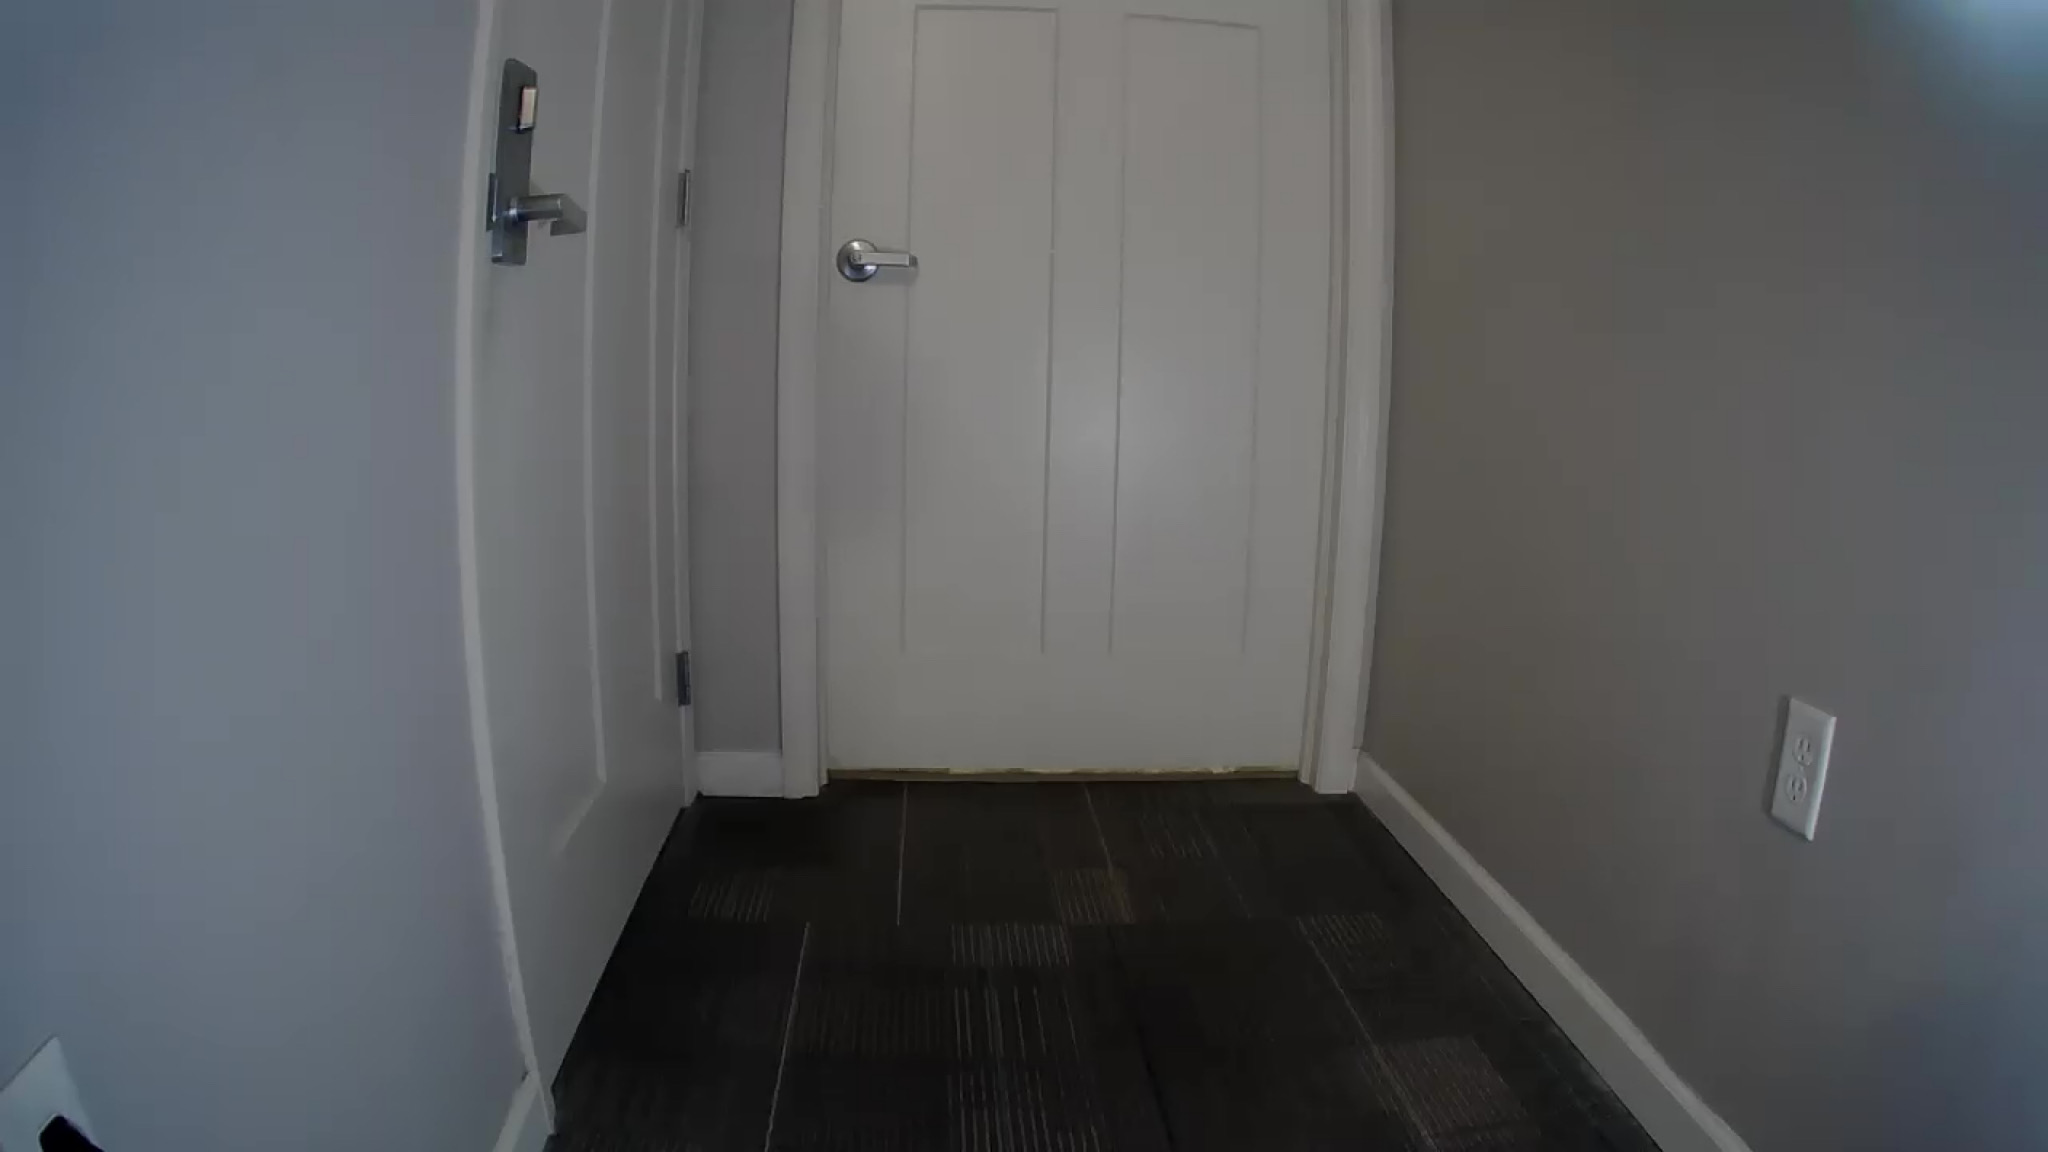

In [35]:
imgL = cv.imread('L_disp.JPG')
imgR = cv.imread('R_disp.JPG')
cv2_imshow(imgR) 
cv2_imshow(imgL)

In [36]:
def downsample_image(image, reduce_factor):
	for i in range(0,reduce_factor):
		#Check if image is color or grayscale
		if len(image.shape) > 2:
			row,col = image.shape[:2]
		else:
			row,col = image.shape

		image = cv.pyrDown(image, dstsize= (col//2, row // 2))
	return image


In [37]:
print(len(imgL))

1152


In [38]:
# disparity = []
# win_size = 5
# stereo = cv.StereoSGBM_create(minDisparity=-2,numDisparities=18, blockSize=21, P1 = 8 * 3 * win_size**2, P2 = 32 * 3 * win_size**2)
# for i in range(len(imgL)):
#     disparity.append(stereo.compute(imgL[i],imgR[i]))
# fig = plt.figure(figsize=(10, 7))
# rows,columns = 1,3
# fig.add_subplot(rows, columns, 1)
# plt.imshow(disparity[0],'gray')
# plt.title("Depth")
# fig.add_subplot(rows, columns, 2)
# plt.imshow(imgL[0],'gray')
# plt.title("Left_stereo_image")
# fig.add_subplot(rows, columns, 3)
# plt.imshow(imgR[0],'gray')
# plt.title("Right_stereo_image")

In [68]:
# imgR = cv.remap(imgR, mapx, mapy, cv.INTER_LANCZOS4, cv.BORDER_CONSTANT, 0)
# imgL = cv.remap(imgL, mapx, mapy, cv.INTER_LANCZOS4, cv.BORDER_CONSTANT, 0)
imgL = cv.imread('L_disp_cropped.png')
imgR = cv.imread('R_disp_cropped.png')

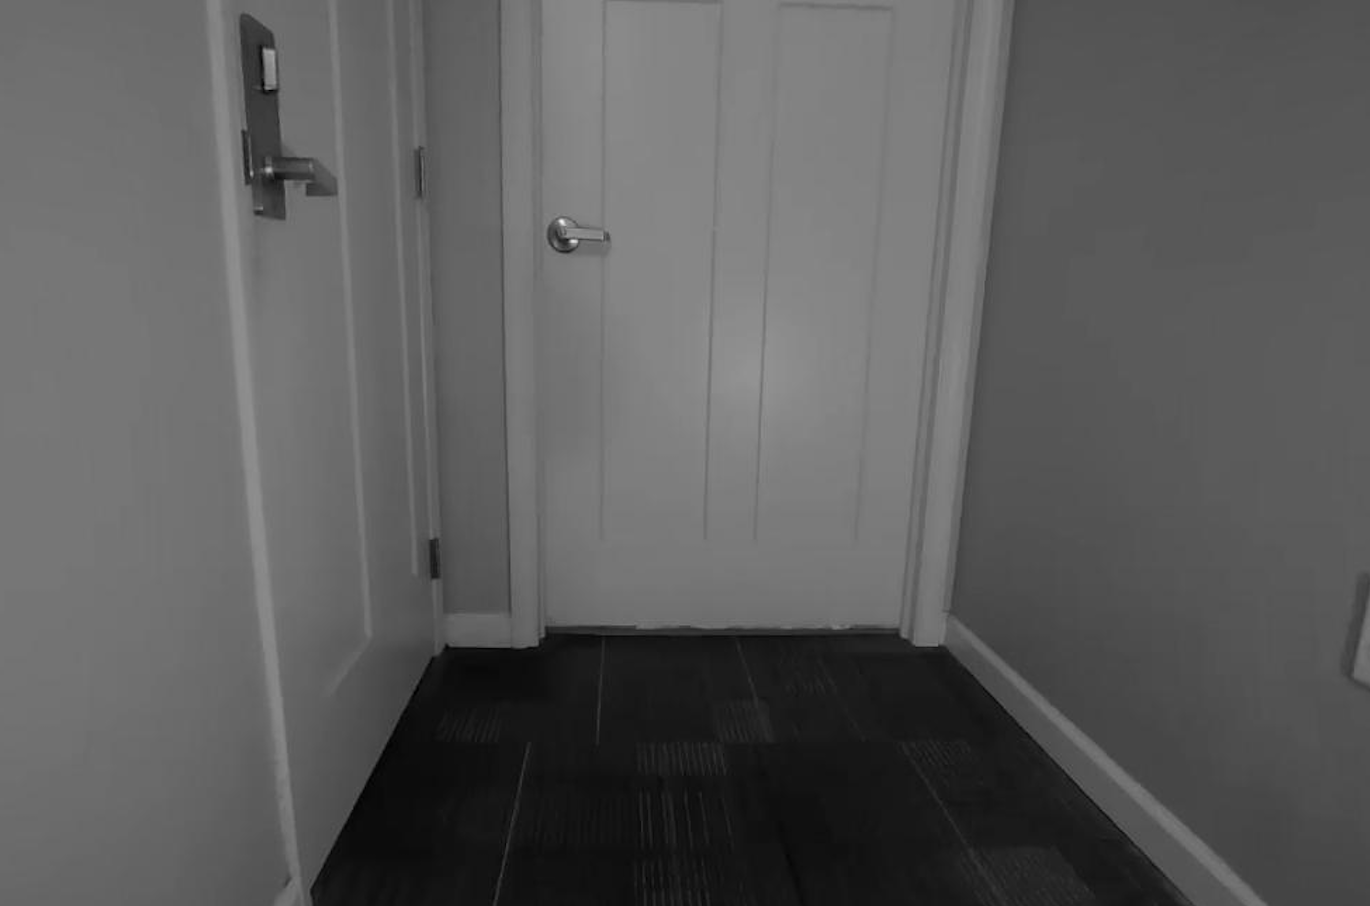

True

In [69]:
cv2_imshow(imgL) 
# cv2_imshow(imgL)
# cv.imwrite('20230223181926Result3.png',imgR)

In [70]:
imgL = downsample_image(imgL,2)
imgR = downsample_image(imgR,2)

In [71]:
# imgLgray = cv.cvtColor(imgL, cv.COLOR_BGR2GRAY)
# imgRgray = cv.cvtColor(imgR, cv.COLOR_BGR2GRAY)
imgLgray = imgL
imgRgray = imgR

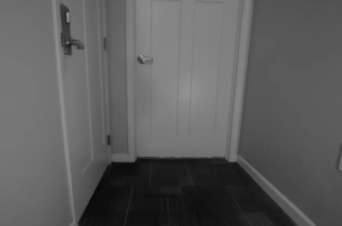

In [73]:
cv2_imshow(imgL) 
# cv2.imshow("frame left downscaled", imgL)

In [74]:
block_size = 5
min_disp = -1
max_disp = 31
num_disp = max_disp - min_disp
stereo = cv.StereoSGBM_create(minDisparity= min_disp,
	numDisparities = num_disp,
	blockSize = block_size,
	uniquenessRatio = 5,
	speckleWindowSize = 5,
	speckleRange = 2,
	disp12MaxDiff = 2,
	P1 = 8 * 3 * block_size**2,
	P2 = 32 * 3 * block_size**2) 

In [76]:
print(len(imgRgray))

226


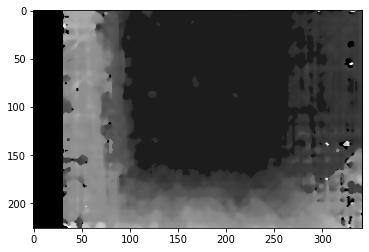

In [77]:
disparity_map = stereo.compute(imgLgray, imgRgray)
plt.imshow(disparity_map,'gray')
plt.show()

In [ ]:
rectifyScale= 1
rectL, rectR, projMatrixL, projMatrixR, Q, roi_L, roi_R= cv.stereoRectify(newCameraMatrix, dist, newCameraMatrix, dist, grayL.shape[::-1], rot, trans, rectifyScale,(0,0))
print(Q)

In [ ]:
h,w = imgR.shape[:2]
print(disparity_map.dtype)
disparity_map = np.float32(np.divide(disparity_map, 16.0))
print(disparity_map.dtype)
points_3D = cv.reprojectImageTo3D(disparity_map, Q, handleMissingValues=False)
colors = cv.cvtColor(imgR, cv.COLOR_BGR2RGB)
mask_map = disparity_map > disparity_map.min()
output_points = points_3D[mask_map]
output_colors = colors[mask_map]

In [ ]:
def create_point_cloud_file(vertices, colors, filename):
	colors = colors.reshape(-1,3)
	vertices = np.hstack([vertices.reshape(-1,3),colors])

	ply_header = '''ply
		format ascii 1.0
		element vertex %(vert_num)d
		property float x
		property float y
		property float z
		property uchar red
		property uchar green
		property uchar blue
		end_header
		'''
	with open(filename, 'w') as f:
		f.write(ply_header %dict(vert_num=len(vertices)))
		np.savetxt(f,vertices,'%f %f %f %d %d %d')


output_file = 'pointCloud.ply'

# Generate point cloud file
create_point_cloud_file(output_points, output_colors, output_file)